<a href="https://colab.research.google.com/github/nyw-pathfinder/Deep-Learning-Bootcamp-with-PyTorch/blob/master/Final_Yunu_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project

- Link: https://git.io/ml2021-final

In the final project, we will to try to find new physics Beyond the Standard Model (BSM) using boosted jets.

In the typical high energy proton-proton collision, the quark and gluons inside the protons interact and simply cause high energy quarks and gluons to be created in the plane transverse to the proton beams.

In [ ]:
from IPython.display import Image
Image('ggqq.png', width=400)

FileNotFoundError: No such file or directory: 'ggqq.png'

FileNotFoundError: No such file or directory: 'ggqq.png'

<IPython.core.display.Image object>

When quarks and gluons decay, they produce a collimated spray of hadrons, which will pass through the calorimeter.
We consider this spray of hadrons as a single object called a **jet**.
This is the default event in high-energy particle collisions (such as the proton-proton collisions at CMS we will consider here): the production of several high-energy jets from standard QCD processes.

In [ ]:
Image('event-jet.png')

FileNotFoundError: No such file or directory: 'event-jet.png'

FileNotFoundError: No such file or directory: 'event-jet.png'

<IPython.core.display.Image object>

The calorimeter destructively reads the energy of the particles through it, in a granular grid of detectors.
We can think of the calorimeter readout as giving pixels in an image, and construct **jet images** of the calorimeter energy deposits produced by the jet constituents.

In [ ]:
Image('jet_image.jpg')

FileNotFoundError: No such file or directory: 'jet_image.jpg'

FileNotFoundError: No such file or directory: 'jet_image.jpg'

<IPython.core.display.Image object>

Our BSM model will be a very simple one. 
A BSM particle gets produced (in conjunction with another quark or gluon) which decays into two jets.

In [ ]:
from IPython.display import Image
Image('BSM_boost.png') # https://arxiv.org/pdf/1901.10342.pdf

FileNotFoundError: No such file or directory: 'BSM_boost.png'

FileNotFoundError: No such file or directory: 'BSM_boost.png'

<IPython.core.display.Image object>

In [ ]:
# And here is the Feynman diagram corresponding to the production and decay of the BSM particle y1.
Image('bsm.png', width=400)

FileNotFoundError: No such file or directory: 'bsm.png'

FileNotFoundError: No such file or directory: 'bsm.png'

<IPython.core.display.Image object>

We will consider the case where the BSM particle is produced with very high momentum, so the two quarks merge into each other.
The BSM particle then looks like a single jet, but with additional substructure compared to a regular jet, due to originating from two quarks. We will build a CNN which takes the jet images and analyzes them for such **jet substructure** in order to distinguish QCD jets (the typical quark-gluon jets) from these BSM jets


In [ ]:
Image('zboost.png')

FileNotFoundError: No such file or directory: 'zboost.png'

FileNotFoundError: No such file or directory: 'zboost.png'

<IPython.core.display.Image object>

An important consideration here is that the **mass** of this BSM jet (sum up the 4-momentum of the constituent particles and you have the 4-momentum of the jet) should be approximately the mass of the underlying particle, while QCD jets will have a fairly random mass (but exponentially less likely to be produced as you increase the mass under consideration).
So, if you have a classifier to distinguish the overwhelming QCD background (which is many orders of magnitude more likely to occur than our BSM model, even in the best case!), you could select the events which pass your BSM criteria, make a histogram of the mass, and look for a bump in the distribution corresponding to the mass of the new BSM particle.

To summarize, the goal of the project will be to distinguish these BSM jets from regular QCD jets.
Fortunately, your colleagues have already implemented an event and jet selection, and have produced jet images of their selected jets, with corresponding true jet masses.
So, all you need to do, is take their jet images, produce a BSM-QCD jet classifier, and then apply it to their data.
You will also need to build a regression model to find the jet mass.

This week, I will give you the "simulated" samples, which have been produced separately for BSM jets, and QCD jets.
You should:
1. explore the dataset to make sure you understand what it contains
2. build a jet classifier network, and a
3. jet mass regression network using the simulated samples.
4. Show that the networks are well trained: check a test set for overtraining, try a second network with a different architecture to compare performance, draw the roc curves for the two networks.
5. Pick your final network to use on the dataset (we are good physicists and do our selections **blinded**, that is, we choose based on expected performance, we don't optimize on our unknown dataset)

Next week, I will give you a "dataset", which may or may not contain BSM events.
You should 
1. apply your classifier to the jet images in the "real data"
2. make a histogram of the jet mass for jets passing the classifier, then 
3. write a short statement as to whether or not your data sample contained new physics (just roughly, if you want to look into more detail as to how to determine the statistical significance of the new physics in your data sample, next semester's course will be "Statistics for Particle Physics"!).

You should finish (and send me a mail saying so!) by the end of the month.

Get the simulated samples:
  1. on gate they are stored in `/store/ml/final-ml-2021/datasets`
  2. otherwise, they can be downloaded from my cernbox:

In [ ]:
# dm500.npz
!wget -O dm500.npz https://cernbox.cern.ch/index.php/s/xNSGpo5X1FXtXtJ/download

# jj3000
!wget -O jj3000.npz https://cernbox.cern.ch/index.php/s/Cq1q1CK49WwtOyP/download

# final
!wget -O final_dataset.npz https://cernbox.cern.ch/index.php/s/jveuBZsFsH8eS2j/download

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


There are 4 samples: a QCD jet sample called `jj3000.npz`, 3 BSM jet samples with events assuming different masses `dm500.npz` for a
500 GeV particle, `dm750.npz` for a 750 GeV particle, and `dm1000.npz` for a 1000 GeV particle. Because we don't know if the BSM particle exists
we don't know the particles mass, so you should try to be able to classify well with all the samples. How you do that is up to you.

Each file contains the jet images that can be accessed with the key `img`, and the corresponding jet masses in `mass` (your file may contain a different number of total entries):

In [ ]:
import numpy as np
import torch as th
from torch.utils.data.dataset import TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
jj3000 = np.load('jj3000.npz')
dm500 = np.load('dm500.npz')
final_dataset = np.load('final_dataset.npz')

jj3000['img'].shape, dm500['img'].shape, final_dataset['img'].shape

((20000, 2, 41, 41), (20000, 2, 41, 41), (30000, 2, 41, 41))

In [ ]:
data_jj3000 = jj3000['img']
data_dm500 = dm500['img']
data_final = final_dataset['img']

In [ ]:
# jj3000 -> label:0, dm500 -> label:1
train_0 = data_jj3000
label_0 = np.zeros(len(data_jj3000)).astype('int')
train_1 = data_dm500
label_1 = np.ones(len(data_dm500)).astype('int')

train_data = np.concatenate([train_0, train_1],axis=0)
train_labels = np.concatenate([label_0, label_1],axis=0)

In [ ]:
train_data.shape, train_labels.shape

((40000, 2, 41, 41), (40000,))

In [ ]:
# split training_set, validation_set
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, shuffle=True)

train_set = TensorDataset(th.FloatTensor(train_data), th.LongTensor(train_labels))
val_set = TensorDataset(th.FloatTensor(val_data), th.LongTensor(val_labels))
test_set = TensorDataset(th.FloatTensor(data_final))

In [ ]:
train_data.shape, val_data.shape, train_labels.shape, val_labels.shape

((32000, 2, 41, 41), (8000, 2, 41, 41), (32000,), (8000,))

In [ ]:
batch_size = 512
train_loader = th.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = th.utils.data.DataLoader(dataset=val_set, batch_size=batch_size, shuffle=True)
test_loader = th.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

In [ ]:
device = 'cuda'
import torch as th
import torch.nn as nn
import torchvision as tv
from collections import defaultdict
import matplotlib.pyplot as plt

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
                                                               
        self.conv1 = th.nn.Conv2d(2,4,3, stride=1, padding=0) # ->39
        self.conv2 = th.nn.Conv2d(4,8,5)                      # ->35
        self.conv3 = th.nn.Conv2d(8,16,7)                     # ->29
        self.conv4 = th.nn.Conv2d(16,32,7)                    # ->23
        self.conv5 = th.nn.Conv2d(32,64,7)                    # ->17
        self.conv6 = th.nn.Conv2d(64,128,9)                   # ->9
        self.conv7 = th.nn.Conv2d(128,256,9)                  # ->1

        # self.partdrop = th.nn.Dropout2d(0.1)
        # self.drop = th.nn.Dropout2d(0.5)
        # self.bn1 = th.nn.BatchNorm2d(4)
        # self.bn2 = th.nn.BatchNorm2d(8)
        # self.bn3 = th.nn.BatchNorm2d(16)
        # self.bn4 = th.nn.BatchNorm2d(32)
        # self.bn5 = th.nn.BatchNorm2d(64)
        # self.bn6 = th.nn.BatchNorm2d(128)
        # self.bn7 = th.nn.BatchNorm2d(256)

        self.fc = th.nn.Linear(256, 2)
        
        #self.fc2 = th.nn.Linear()
        #self.fc3 = th.nn.Linear()
        #th.nn.Sequential()
        #self.apool = th.nn.AvgPool2d()
        #self.mpool = th.nn.MaxPool2d()
    def forward(self, x):      # order: conv batchnorm relu dropout --- fc sigmoid
        x = self.conv1(x)
        x = th.relu(x)
        x = self.conv2(x)
        x = th.relu(x)
        x = self.conv3(x)
        x = th.relu(x)
        x = self.conv4(x)
        x = th.relu(x)
        x = self.conv5(x)
        x = th.relu(x)
        x = self.conv6(x)
        x = th.relu(x)
        x = self.conv7(x)
        x = th.relu(x).reshape(-1,256)
        x = self.fc(x)
        #x = th.sigmoid(x).reshape(-1)
        x = th.sigmoid(x)
        
        return x

epoch 000 : train loss 0.600 acc 0.694 test loss 0.585 acc 0.712
  saving network
epoch 001 : train loss 0.569 acc 0.731 test loss 0.564 acc 0.738
  saving network
epoch 002 : train loss 0.563 acc 0.736 test loss 0.560 acc 0.742
  saving network
epoch 003 : train loss 0.559 acc 0.739 test loss 0.555 acc 0.746
  saving network
epoch 004 : train loss 0.547 acc 0.752 test loss 0.548 acc 0.753
  saving network
epoch 005 : train loss 0.542 acc 0.757 test loss 0.546 acc 0.755
  saving network
epoch 006 : train loss 0.542 acc 0.756 test loss 0.550 acc 0.749
epoch 007 : train loss 0.532 acc 0.767 test loss 0.544 acc 0.753
  saving network
epoch 008 : train loss 0.531 acc 0.769 test loss 0.535 acc 0.765
  saving network
epoch 009 : train loss 0.527 acc 0.775 test loss 0.534 acc 0.767
  saving network
epoch 010 : train loss 0.520 acc 0.780 test loss 0.528 acc 0.771
  saving network
epoch 011 : train loss 0.523 acc 0.777 test loss 0.526 acc 0.774
  saving network
epoch 012 : train loss 0.517 acc 

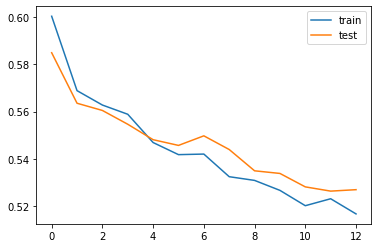

In [ ]:
net = CNN().to(device)
opt = th.optim.Adam(net.parameters(),lr=0.0005)
l = th.nn.CrossEntropyLoss()
per_epoch = defaultdict(lambda:[])
prev_loss = 0
e = 0

n_epochs = 30
for epoch in range(n_epochs):
    per_batch = defaultdict(lambda:[])
    
    net.train()
    for i, (train_data, train_labels) in enumerate(train_loader):        
        images = train_data.to(device)
        labels = train_labels.to(device)
        opt.zero_grad()
        outputs = net(images)
        loss = l(outputs, labels)
        loss.backward()
        opt.step()
        per_batch["loss"].append(loss.item()*images.size(0))        
        per_batch["corr"].append(sum((th.max(outputs,1)[1]==labels).float()))
        per_batch["n"].append(images.size(0))
    per_epoch["loss"].append(sum(per_batch["loss"])/sum(per_batch["n"]))
    per_epoch["acc"].append(sum(per_batch["corr"])/sum(per_batch["n"]))
    
    net.eval()
    with th.no_grad():
        for i, (val_data, val_labels) in enumerate(val_loader):        
            images = val_data.to(device)
            labels = val_labels.to(device) 
            outputs = net(images)
            loss = l(outputs, labels)
            per_batch["tloss"].append(loss.item()*images.size(0))
            per_batch["tcorr"].append(sum((th.max(outputs,1)[1]==labels).float()))
            per_batch["tn"].append(images.size(0))
    per_epoch["tloss"].append(sum(per_batch["tloss"])/sum(per_batch["tn"]))
    per_epoch["tacc"].append(sum(per_batch["tcorr"])/sum(per_batch["tn"]))
    print(f'epoch {e:03d} : train loss {per_epoch["loss"][-1]:.3f} acc {per_epoch["acc"][-1]:.3f} test loss {per_epoch["tloss"][-1]:.3f} acc {per_epoch["tacc"][-1]:.3f}')
    # early stopping: if we are at the best epoch (= epoch with lowest loss), save the weights
    e += 1      
    if per_epoch["tloss"][-1] == min(per_epoch["tloss"]):
        print("  saving network")
        th.save(net.state_dict(), 'fnet_weights.pt')
    
    if abs(prev_loss - per_epoch["tloss"][-1]) < 0.001:
          break
          
    prev_loss = per_epoch["tloss"][-1]
          
print("done training.")
# reload the best weights
net.load_state_dict(th.load('fnet_weights.pt'))
# Make plots of the training/testing losses
plt.plot(per_epoch["loss"], label="train")
plt.plot(per_epoch["tloss"], label="test")
plt.legend(loc="upper right")

In [ ]:
# test set   
net.eval()
with th.no_grad():
    labels = []
    for i, (test_data, ) in enumerate(test_loader):        
        images = test_data.float().to(device) 
        outputs = net(images)        
        labels.append(th.max(outputs,1)[1])
    labels = th.cat(labels)

In [ ]:
test_data = th.FloatTensor(data_final)

In [ ]:
test_data.shape, labels.shape

(torch.Size([30000, 2, 41, 41]), torch.Size([30000]))